# **Membuat Model NLP dengan Tensorflow**

Muhammad Abdiel Firjatullah

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
df = pd.read_csv('vgsales.csv')

In [2]:
df = df[['Name', 'Genre']]
df.head()

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing


In [3]:
category = pd.get_dummies(df.Genre, dtype=int)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Genre')
df_new

,Name,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0,0,0,0,1,0,0,0,0,0,0,0
16594,Men in Black II: Alien Escape,0,0,0,0,0,0,0,0,1,0,0,0
16595,SCORE International Baja 1000: The Official Game,0,0,0,0,0,0,1,0,0,0,0,0
16596,Know How 2,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
name = df_new['Name'].values
label = df_new[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']]

In [5]:
from sklearn.model_selection import train_test_split
name_train, name_val, label_train, label_val = train_test_split(name, label, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(name_train)
tokenizer.fit_on_texts(name_val)

sekuens_train = tokenizer.texts_to_sequences(name_train)
sekuens_val = tokenizer.texts_to_sequences(name_val)

padded_train = pad_sequences(sekuens_train)
padded_val = pad_sequences(sekuens_val)

In [7]:
class callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy') > 0.75):
      print('\nAkurasi diatas 80%')
      self.model.stop_training = True

callbacks = callbacks()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(
    padded_train,
    label_train,
    epochs=30,
    validation_data=(padded_val, label_val),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/30
415/415 - 20s - loss: 1.9155 - accuracy: 0.3682 - val_loss: 1.3812 - val_accuracy: 0.5506 - 20s/epoch - 49ms/step
Epoch 2/30
415/415 - 13s - loss: 1.0169 - accuracy: 0.6942 - val_loss: 1.0629 - val_accuracy: 0.6922 - 13s/epoch - 30ms/step
Epoch 3/30
415/415 - 13s - loss: 0.6739 - accuracy: 0.8016 - val_loss: 1.0225 - val_accuracy: 0.7220 - 13s/epoch - 30ms/step
Epoch 4/30
415/415 - 12s - loss: 0.5224 - accuracy: 0.8440 - val_loss: 1.0021 - val_accuracy: 0.7316 - 12s/epoch - 29ms/step
Epoch 5/30
415/415 - 13s - loss: 0.4267 - accuracy: 0.8686 - val_loss: 1.1057 - val_accuracy: 0.7280 - 13s/epoch - 31ms/step
Epoch 6/30
415/415 - 13s - loss: 0.3716 - accuracy: 0.8838 - val_loss: 1.1112 - val_accuracy: 0.7416 - 13s/epoch - 31ms/step
Epoch 7/30
415/415 - 13s - loss: 0.3139 - accuracy: 0.8991 - val_loss: 1.2183 - val_accuracy: 0.7443 - 13s/epoch - 32ms/step
Epoch 8/30
415/415 - 12s - loss: 0.2710 - accuracy: 0.9104 - val_loss: 1.2766 - val_accuracy: 0.7422 - 12s/epoch - 30ms/step


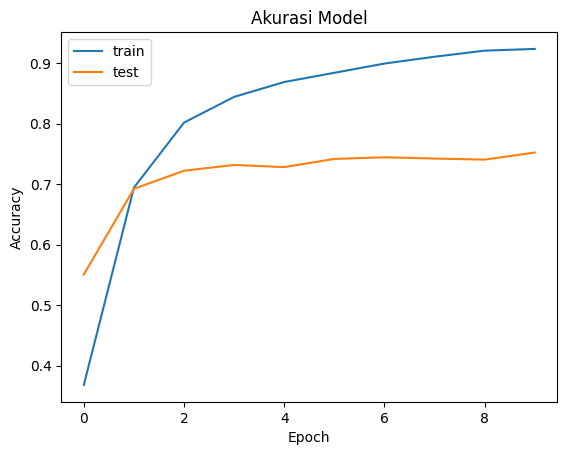

In [10]:
# akurasi model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

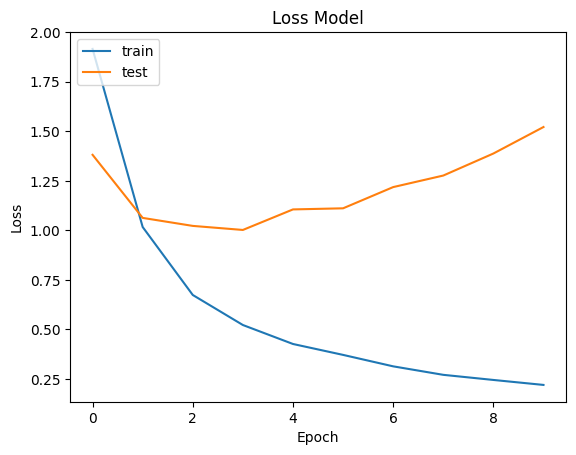

In [11]:
# loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()